In [71]:
# Importing related libraries
from bs4 import BeautifulSoup as bs4
import requests
import pandas as pd

In [72]:
# Web-page to scratch table
url = 'https://en.wikipedia.org/wiki/List_of_La_Liga_top_scorers'

# Getting response file
html_response = requests.get(url)

# Parsing into bs4
if html_response.status_code == 200:
    soup = bs4(html_response.text, 'html.parser')

In [73]:
# Capturing related table, may check with table to scratch from source code
table = soup.find('table', class_='wikitable sortable').find('tbody').find_all('tr')[1:]

In [74]:
# Creating empty df to insert into scratch data from table
df = pd.DataFrame(columns=['Player', 'Goals', 'Goals_Per_Game', 'Clubs'])

In [75]:
# Inserting data into df
for row in table:
    # Capturing related cell data from table
    player_name = row.find('td', {'data-sort-value':True}).get_text(strip=True)
    goals = row.find_all('td')[2].get_text(strip=True)
    ratio = row.find_all('td')[4].get_text(strip=True)
    club = row.find_all('td')[7].get_text(strip=True)
    
    # Creating df_temp which contains cell data per row from table
    df_temp = pd.DataFrame({'Player':[player_name], 'Goals':[goals],
                           'Goals_Per_Game':ratio, 'Clubs':club})

    # Adding df_temp into empty df
    df = pd.concat([df,df_temp], ignore_index=True)

In [77]:
# Checking df
df.head()

,Player,Goals,Goals_Per_Game,Clubs
0,Lionel Messi,474,0.91,Barcelona
1,Cristiano Ronaldo,311,1.07,Real Madrid
2,Telmo Zarra,251,0.91,Athletic Bilbao
3,Karim Benzema,238,0.54,Real Madrid
4,Hugo Sánchez,234,0.67,"Atlético Madrid(54/111),Real Madrid(164/207),R..."


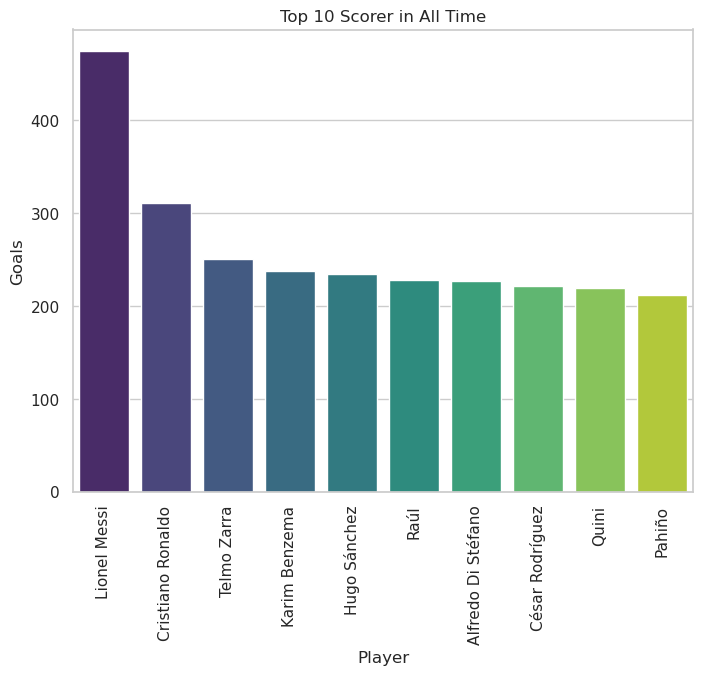

In [105]:
# Top 10 scorer in all time
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style='whitegrid')
plt.figure(figsize=(8,6))
sns.barplot(x=df['Player'][:10], y=df['Goals'][:10].astype(int), palette='viridis')
plt.xticks(rotation=90)
plt.title('Top 10 Scorer in All Time');